In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [2]:
data = pd.read_excel (r'C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\2013-2020-RK-PURAM-final-dataset\3y_weekly_RKPURAM.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [3]:
import datetime as dt

In [4]:
data.columns

Index(['From Date', 'PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'SO2y1', 'COy1', 'Ozoney1', 'RHy1', 'WSy1', 'WDy1', 'SRy1', 'BPy1',
       'ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2',
       'COy2', 'Ozoney2', 'RHy2', 'WSy2', 'WDy2', 'SRy2', 'BPy2', 'ATy2',
       'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'COy3',
       'Ozoney3', 'RHy3', 'WSy3', 'WDy3', 'SRy3', 'BPy3', 'ATy3', 'PM2.5',
       'PM1', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'RH', 'WS',
       'WD', 'SR', 'BP', 'AT', 'year', 'month', 'day'],
      dtype='object')

In [5]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [6]:
df=data.loc['0':'207']

In [7]:
df.columns

Index(['From Date', 'PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'SO2y1', 'COy1', 'Ozoney1', 'RHy1', 'WSy1', 'WDy1', 'SRy1', 'BPy1',
       'ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2',
       'COy2', 'Ozoney2', 'RHy2', 'WSy2', 'WDy2', 'SRy2', 'BPy2', 'ATy2',
       'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'COy3',
       'Ozoney3', 'RHy3', 'WSy3', 'WDy3', 'SRy3', 'BPy3', 'ATy3', 'PM2.5',
       'PM1', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'RH', 'WS',
       'WD', 'SR', 'BP', 'AT', 'year', 'month', 'day'],
      dtype='object')

In [8]:
X1 = df[['PM2.5y1','PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1', 'COy1','WSy1', 'ATy1','PM2.5y2','PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'COy2','WSy2', 'ATy2','PM2.5y3','PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'COy3','WSy3', 'ATy3','year', 'month', 'day']]
Y1 = df['PM2.5']

In [9]:
xtrain=X1.loc['0':'155']
ytrain=Y1.loc['0':'155',]
xtest=X1.loc['155':'207']
ytest=Y1.loc['155':'207']

In [60]:
#xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state=24)

In [40]:
grad_boost = GradientBoostingRegressor(n_estimators=2000,
                                      max_depth=7,
                                      max_features=0.2,
                                      min_samples_split=4,
                                      min_samples_leaf=5,
                                      learning_rate=0.001)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(learning_rate=0.001, max_depth=7, max_features=0.2,
                          min_samples_leaf=5, min_samples_split=4,
                          n_estimators=2000)

In [41]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.903184634977625

Score on test data: 0.6156903766719217

Root Mean Squared Error: 47.19260416626845

Overall model accuracy: 0.6156903766719217


In [42]:
test=data.loc['207':'259']
X=test[['PM2.5y1','PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1', 'COy1','WSy1', 'ATy1','PM2.5y2','PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'COy2','WSy2', 'ATy2','PM2.5y3','PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'COy3','WSy3', 'ATy3','year', 'month', 'day']]
X

,PM2.5y1,PM1y1,NOy1,NO2y1,NOxy1,NH3y1,COy1,WSy1,ATy1,PM2.5y2,...,NOy3,NO2y3,NOxy3,NH3y3,COy3,WSy3,ATy3,year,month,day
207,302.818571,428.861429,125.535714,76.847143,144.901429,32.607143,2.175714,0.645714,8.394286,217.428571,...,100.627143,83.730000,212.015714,56.007143,2.998571,1.072857,12.122857,2019,12,29
208,316.292857,456.537143,109.870000,52.067143,117.267143,29.011429,1.537714,0.671429,8.800000,264.292857,...,98.832857,67.225714,194.864286,57.234286,3.004286,0.885714,10.478571,2020,1,5
209,241.932857,349.680000,84.832857,58.215714,100.144286,31.015714,0.970000,0.888571,11.971429,191.864286,...,101.944286,57.842857,190.755714,48.108571,2.867143,0.792857,12.764286,2020,1,12
210,253.915714,405.144286,117.140000,58.545714,126.631429,28.408571,1.768000,0.818571,9.905714,237.660000,...,94.412857,75.028571,195.770000,43.388571,2.740000,0.822857,8.177143,2020,1,19
211,128.998571,223.215604,34.865714,44.648571,52.171429,23.565714,2.566000,0.965714,10.632857,173.172857,...,49.015714,68.434286,127.910000,44.487143,1.844286,0.955714,9.742857,2020,1,26
212,187.365714,225.330769,47.905714,49.550000,65.417143,23.558571,2.305429,1.020000,9.834286,143.550000,...,74.012857,62.091429,156.391429,42.347143,2.127143,1.098571,13.330000,2020,2,2
213,146.527143,198.920769,65.595714,50.381429,80.275714,22.507143,1.334286,1.088571,11.920000,193.068571,...,153.021429,66.960000,268.622857,39.584286,2.754286,1.011429,13.437143,2020,2,9
214,193.267143,333.581429,73.142857,72.708571,98.288571,27.225714,1.971429,0.791429,13.324286,109.957143,...,50.672857,67.874286,129.678571,30.340000,1.890000,1.112857,13.547143,2020,2,16
215,110.288571,192.155714,68.825714,73.708571,96.087143,27.742857,1.424286,1.167143,15.858571,166.732857,...,34.234286,82.401429,120.168571,37.265714,1.715714,1.247143,16.775714,2020,2,23
216,108.875000,172.547857,86.743571,88.330000,117.698571,27.334286,1.810714,0.940000,12.517143,109.975714,...,38.925714,62.438571,108.778571,26.370000,1.704286,1.481429,17.097143,2020,3,1


In [43]:
predict=grad_boost.predict(X)

In [44]:
predict

array([198.31624229, 177.81122336, 151.49171529, 184.15545422,
       134.9309439 , 127.18096035, 139.4818746 , 122.14309215,
       128.17066733, 113.07209019, 106.99471772, 107.3086168 ,
        94.51920706, 103.24301167,  93.40947413,  88.49817062,
       107.38378085, 121.03565567,  85.52172771, 114.62319516,
        92.39628598, 109.9521174 ,  94.18470974,  73.47239264,
        95.42571505,  82.68657368,  70.14614809,  70.16237175,
        66.80272253,  61.05571421,  59.21647915,  65.48593508,
        64.32744637,  62.35182114,  58.57302915,  59.80874281,
        64.68010924,  62.90202415,  62.28202588,  75.11206942,
        98.15960396, 112.06885378, 123.43576683, 151.19680512,
       167.85273279, 166.14617921, 188.81458434, 170.21096458,
       183.28299735, 183.29376309, 182.04208793, 175.37035075,
       200.54331024])

In [45]:
dates=data.loc['207':'259','From Date']

In [46]:
X['From Date']=dates.values

In [47]:
X.columns

Index(['PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1', 'COy1', 'WSy1',
       'ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'COy2',
       'WSy2', 'ATy2', 'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3',
       'COy3', 'WSy3', 'ATy3', 'year', 'month', 'day', 'From Date'],
      dtype='object')

In [48]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [49]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [50]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [51]:
X['pred']=predict

<AxesSubplot:xlabel='From Date'>

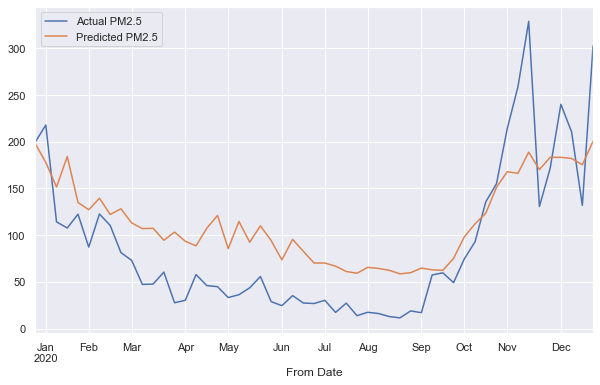

In [52]:
test['PM2.5'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted PM2.5')

In [53]:
np.sqrt(mean_squared_error(test['PM2.5'],X['pred']))

52.02221509511924

In [54]:
mae = metrics.mean_absolute_error(ytest, gboost_pred)
mse = metrics.mean_squared_error(ytest, gboost_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,gboost_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 37.08729911243059
MSE: 2227.1418879940984
RMSE: 47.19260416626845
R-Squared: 0.6156903766719217


In [55]:
mae = metrics.mean_absolute_error(test['PM2.5'],X['pred'])
mse = metrics.mean_squared_error(test['PM2.5'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['PM2.5'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 45.17656886446093
MSE: 2706.3108634028526
RMSE: 52.02221509511924
R-Squared: 0.5687051662185352


In [56]:
import pickle
filename = 'PM2.5_gboost3y.sav'
pickle.dump(grad_boost, open(filename, 'wb'))

In [57]:
#load model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

0.6156903766719217


# 3rd plot

In [58]:
testcase = pd.DataFrame()

In [59]:
testcase['test']=ytest
testcase['pred']=gboost_pred

In [60]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [61]:
testcase

,test,pred,Corrected
155,302.818571,256.261915,303.454520
156,316.292857,176.506399,223.699003
157,241.932857,151.591545,198.784149
158,253.915714,197.245704,244.438309
159,128.998571,179.892638,132.700034
160,187.365714,158.071365,205.263969
161,146.527143,147.193627,100.001023
162,193.267143,109.525777,156.718381
163,110.288571,126.035997,78.843393
164,108.875000,108.229502,155.422106


In [62]:
'''testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')'''

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [63]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.8365929740054857

In [64]:
test2020=pd.DataFrame()

In [65]:
test2020['test']=test['PM2.5']
test2020['pred']=X['pred']

In [66]:
test2020.index=test.index

In [67]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

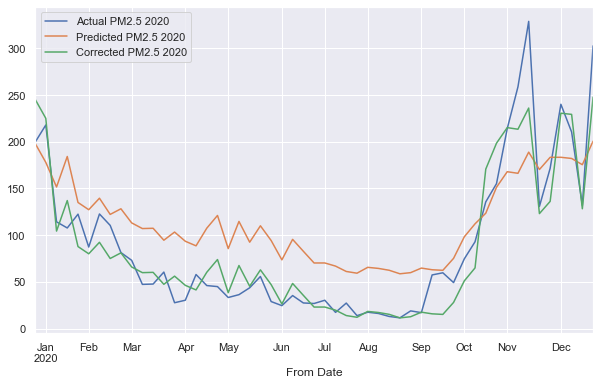

In [68]:
test2020['test'].plot(legend=True, label='Actual PM2.5 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted PM2.5 2020')
test2020["Corrected"].plot(legend=True, label='Corrected PM2.5 2020')

In [69]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.8762420219539845